----

Hunter Carroll
---

Midterm Programming Project: Spam Classification
---

<font color = 'purple'>Details:</font>

The purpose of this project is to train a classifier to detect email spams (spam $y=1$, non-spam $y=0$).

First, we need to change any text email to numerical values (a feature vector $\boldsymbol{x}\in\mathbb{R}^n$). We walk through the steps of constructing such a vector from an email.

---

---

<font color = 'purple'> Preprocessing Emails (20 pts)</font>
---

<font color = 'purple'>Task:</font>

The file named "email1.txt" contains an example email that contains words, numbers, an email address, a URL, special letters (e.g. the dollar sign). Since many emails may contain numbers, email addresses, URLs, special letters, it is common practice to "normalize" these values, so that all email addresses, URLs, etc. are treated the same. For example, we can replace any URL with a special string "httpaddress" to indicate a URL exists. The purpose is to let the spam classifier know a URL is present, instead of what the URL is. Following this idea, we will implement the following steps for any raw email:

1. Lower-casing: convert all letters to lower case
2. Normalizing URLs: All URLs are replaced with the text "httpaddr".
3. Normalizing email addresses: Replace all email addresses with the text "emailaddr"
4. Normalizing numbers: Replace all numbers with the text "number".
5. Normalizing Dollars: Replace all dollar signs $\$$ with the text "dollar".
6. Stemming words: For example, "replacing", "replaces", "replaced" are all replaced with "replace"
7. Removing non-words: Remove non-words and punctuations. All white spaces (tabs, newlines ('\n'), spaces) should be trimmed to a single space character.


<font color = 'purple'>Hints:</font>

Here are the codes to realize all the steps above in Python. Suppose we have a string variable named str1.

1. `str1.lower()` converts all uppercase characters in str1 into lowercase characters (note that str1 itself does not change.)
2. Replace URLs by: `re.sub(r'(http|https)://[^\s]*', 'httpaddr', str1)`
3. Replace email addresses by: `re.sub('[^\s]+@[^\s]+', 'emailaddr', str1);`
4. Replace all numbers by: `re.sub('[0-9]+', 'number', str1)`
5. Replace dollar sign by: `re.sub('[$]+', 'dollar', str1)`
6. Word Stemming: first build a PorterStemmer class by: `ps = PorterStemmer()`, then stemming the words by: 

str1 = " ".join([ps.stem(word) for word in str1.split()])

7. Remove non-words and punctuations by:
   
`re.sub(r'[\'\"@$%/#.:,&*+=?!\[\](){}>_<]', '', str1)`

Trim white spaces to a single space character by: `re.sub(r'\s+',' ', str1)`

Finally strip the string (remove spaces at the beginning and at the end of the string) by:
`str1 = str1.strip()`

<font color = 'purple'>Expected Output:</font>

Run the function ProcessEmail for the email string that was read in earlier. If you get the following content, then congratulations, your code works.

`anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr`

---

<font color = 'purple'> My Solution:</font>
---

In [124]:
# Library Used, 
import re
from nltk.stem import PorterStemmer 
import pandas as pd
import numpy as np

# Load in the data, 
email = open('email1.txt', 'r').read()

# Create the preprocessing function, 
def ProcessEmail(emailstring):
    """
    Process the 7 steps above for an email string
    input: emailstring: the string that contains the email content. type: string
    return: a string that is the processed email content
    """
    # First step, we will convert all uppercase lettering to be lowercase. 
    ProcessedEmail = emailstring.lower()
    # Second step, we will replace all URLs with httpaddr
    ProcessedEmail = re.sub(r'(http|https)://[^\s]*', 'httpaddr', ProcessedEmail)
    # Third Step, replace email addressed with emailaddr
    ProcessedEmail = re.sub('[^\s]+@[^\s]+', 'emailaddr', ProcessedEmail)
    # Fourth step, replace all numbers by number
    ProcessedEmail = re.sub('[0-9]+', 'number', ProcessedEmail)
    # Fifth step, replace dollar sign with dollar
    ProcessedEmail = re.sub('[$]+', 'dollar', ProcessedEmail)
    # Seventh Step, remove non-words and punctuations
    ProcessedEmail = re.sub(r'[\'\"@$%/#.:,&*+=?!\[\](){}>_<]', '', ProcessedEmail)
    ProcessedEmail = re.sub(r'\s+',' ', ProcessedEmail)
    ProcessedEmail = ProcessedEmail.strip()
    # Sixth Step, word stemming
    ps = PorterStemmer()
    ProcessedEmail = " ".join([ps.stem(word) for word in ProcessedEmail.split()])

    return ProcessedEmail

# Run the function with our sample email
processed_email = ProcessEmail(email)

print('===')
print(processed_email)
print('===')

# The expected output, 
Answer_String = """anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr"""

#Checking the answers match each other, 

print(Answer_String==processed_email, ': The answers match as desired. ')
print('===')

===
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
===
True : The answers match as desired. 
===


---

<font color = 'purple'>Vocabulary List (25 pts)</font>
---

After the emails are preprocessed, we now have a string that contains a list of words for
each email. In the next step, we choose the words we would like to use in our classifier and ignore the rest. Suppose, based on a large number of email samples, we have already chosen the most frequently occuring words as the set of words to be considered, known as the vocabulary list, which is stored in `vocab.txt`. Each word has an index. Given the vocabulary list, we can now map each word in the preprocessed emails into a list of indices, each of which is the index of the word in the vocabulary list. Specifically, in the sample email, the word "anyon" can be mapped onto the index 86 in the vocabulary list. If a word is not in the vocabulary, ignore it. Now write a function in the following form:

<font color = 'purple'> Expected Output:</font>

Test your EmailToIndices function on the preprocessed email string obtained earlier. If you get the following list of integers, congratulations again, your code works.

`[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]`

---

<font color = 'purple'> My Solution:</font>
---


In [125]:
# Read in the data and print the vocab with the index, 
vocab = pd.read_csv('vocab.txt', delim_whitespace=True, names=['index', 'word'])
vocab.head(5)

,index,word
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [126]:
# Create the function to map our sample processed email to indexes in our vocab
def EmailToIndices(processed_email, vocab_df):
    """
    Turn processed email string to a list of indices
    input: processed_email: a string of preprocessed email
           vocab_df: the vocabulary data frame
    return: a list of integers, which are the indices of the words in the vocabulary list
    Hint1: First, you need to turn the email string to a list of words by 
           processed_email.split(); then for each word check if it is in the vocabulary;
           if it is in it, then find the corresponding index and append it to your 
           index list; otherwise ignore it.
    Hint2: To build the list of indices, you can start with an empty list [] and append
           indices one by one as you find them using the append function associated with 
           the list
    Hint3: to check if a word, say "anyon" appears in the "word" column of the vocabulary
           you can use "anyon" in vocab['word'].values, which will give you a True or
           False
    """
    # First step, we will turn our processed email into a vocabulary list of words, 
    Vocab_List = processed_email.split()
    # Second step, we will create out empty list where we will store indices one by one, 
    indices = []
    # Third step, loop through our vocab dataframe and get the indices associated with our processed email
    for word in Vocab_List: # for word in our processed df
        if word in vocab_df['word'].values: # check if the word from processed email is in vocab_df
            index = vocab_df[vocab_df['word'] == word]['index'].values[0] # if vocab_df has word then get index
            indices.append(index) # then append the associated index to our empty list

    return indices

Index_List = EmailToIndices(processed_email, vocab)
Expected_Output = [86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]
print('===')
print(Index_List == Expected_Output, ': The list of integers match that as required.')
print('===')

===
True : The list of integers match that as required.
===


In [127]:
# Checking the length of our index list and our expected output, 
print('Index List Length = ', len(Index_List))
print('Expected Output Index List Length = ', len(Expected_Output))
print('===')
print(Index_List)
print('===')

Index List Length =  52
Expected Output Index List Length =  52
===
[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]
===


---

<font color = 'purple'>Extracting Features from Emails (25 pts)</font>
---

Now we will convert each email into a vector in $R^n$ as the features, where $n$ is the number of words in the vocabulary list. Specifically, the feature $x_i=0$ or $1$ for an email depending on whether the $i$-th word in the vocabulary list occurs in the email. That is, $x_i = 1$ if the $i$-th word is in the email and $x_i = 0$ if the i-th word is not present in the email. Write a function that converts a list of indices obtained from the previous function to a feature vector in $R^n$. Follow the following form:


---

<font color = 'purple'>My Solution</font>
---

In [128]:
# Input, 
print('===')
print('Input=',Index_List) # our list of integers that are the indices of the words in the email
print('===')
# return, 
print('Rows in 1-d numpy array=',len(vocab)) # a one dimensional numpy array with our features with the size of 1899
print('===')

===
Input= [86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]
===
Rows in 1-d numpy array= 1899
===


In [129]:
def FeatureExtraction(indices, vocab_df):
    """
    Convert a list of word indices to a feature vector
    input: indices: a list of integer, which are the indices of the words in the email
           vocab_df: the vocabulary data frame
    return: a one-dimensional numpy array that contains the features. The size of the
            array is equal to the number of rows of the vocabulary data frame
    PAY ATTENTION: the index in the vocabulary starts with 1, but for numpy array index
                   starts from 0

    """
    n = len(vocab_df)
    features = np.zeros(n)
    adjusted_indices = [index - 1 for index in indices]
    for i in adjusted_indices:
        features[i]=1
    return features

feature_vector = FeatureExtraction(Index_List, vocab)

print('===')
print('Feature Vector = ',feature_vector)
print('Shape of Feature Vector = ', feature_vector.shape)
print('If the rows of Feature Vector match the rows in Vocab = ', len(feature_vector) == len(vocab))
print('Number of non-zero entries in Feature Vector = ', np.count_nonzero(feature_vector))
print('===')

===
Feature Vector =  [0. 0. 0. ... 0. 0. 0.]
Shape of Feature Vector =  (1899,)
If the rows of Feature Vector match the rows in Vocab =  True
Number of non-zero entries in Feature Vector =  44
===


---

<font color ='purple'>Training SVM for Spam Classification (30 pts)</font>
---

<font color = 'purple'>Task:</font>

Now suppose we have preprocessed a bunch of emails and manually labled them. Each original email was processed using the ProcessEmail, EmailToIndices, and FeatureExtraction functions in sequence, and converted into a vector in $R^{1899}$. We use the data to train a Linear SVM classifier. The file "spamTrain.npy" contains 4000 training examples of spam and non-spam email, while "spamTest.npy" contains 1000 test examples. The last column is the target label (spam: y=1, non-spam: y=0). Use np.load(filename) to read in the data.

1. For training the linear SVM, consider $C=\{0.05, 1.0, 2.0\}$. Set random_state=10, loss='hinge', and all the other parameters are by default. For each model report the accuracy on the test data (LinearSVC has a built in function to calculate accuracy). Also report the best model based on the accuracy values.

2. Look at the parameters $\boldsymbol{w}=\{w_1,w_2,\dots,w_n\}$ of the underlying linear model. Make a plot of the absolute values of $\boldsymbol{w}$ versus the indices $[0,1,2,...n-1]$. Are some weights $w_i$ significantly larger than the rest of the weights from the graph? If so, the words corresponding to the larger weights are the most predictive of spam. Find those words. (Hint: you need to find the indices (positions) of the 15 largest values in the vector $\boldsymbol{w}$. The function np.argsort may help. Check the usage of the function. Then use the indices to find the words in the vocabulary data frame.


---

<font color = 'purple'>My Solution:</font>
---

In [130]:
# Necessary Library, 
from sklearn.svm import LinearSVC

# Load in the data, 
spamTrain = np.load('/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/MidtermProject1/spamTrain.npy')
spamTest = np.load('/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/MidtermProject1/spamTest.npy')

# Split the data into features and labels where the last column is the target label -> spam for y=1 and non-spam for y=0, 
print(' \n === The Training and Testing Data === \n')
X_train, y_train = spamTrain[:, :-1], spamTrain[:, -1]
X_test, y_test = spamTest[:, :-1], spamTest[:, -1]
print('X_train Shape =', X_train.shape, '& y_train Shape = ', y_train.shape)
print('X_test Shape =', X_test.shape, '& y_test Shape = ', y_test.shape)

 
 === The Training and Testing Data === 

X_train Shape = (4000, 1899) & y_train Shape =  (4000,)
X_test Shape = (1000, 1899) & y_test Shape =  (1000,)


In [138]:
# Initialize our C values we will be using three different ones and accessing their accuracy, 
C_values = [0.05, 1.0, 2.0]

# Where each model at each C will be stored for later reference, 
models = {}

# Train the model and loop through each C value
for C_val in C_values:
    spam_svc = LinearSVC(C=C_val, random_state=10, loss='hinge', dual = 'auto') # dual = 'auto' to supress warning
    # Train the model
    spam_svc.fit(X_train, y_train)
    # Get the model accuracy
    accuracy = spam_svc.score(X_test, y_test)
    print(f' \n === Model Performance C = {C_val} === \n')
    # Print the accuracy for each model
    print(f"Accuracy for C={C_val}: {accuracy*100:.2f}%")
    
    # Store the model and its accuracy
    models[C_val] = accuracy

# Find the best model for best test accuracy
best_C = max(models, key=models.get)
best_accuracy = models[best_C]
print(' \n === Best Performing Model === \n')
print(f"The best model is with C={best_C}, with an accuracy of {best_accuracy*100:.2f}% on the test data.")

 
 === Model Performance C = 0.05 === 

Accuracy for C=0.05: 99.20%
 
 === Model Performance C = 1.0 === 

Accuracy for C=1.0: 97.70%
 
 === Model Performance C = 2.0 === 

Accuracy for C=2.0: 97.40%
 
 === Best Performing Model === 

The best model is with C=0.05, with an accuracy of 99.20% on the test data.



 === Absolute Value of Weights vs. Indices === 



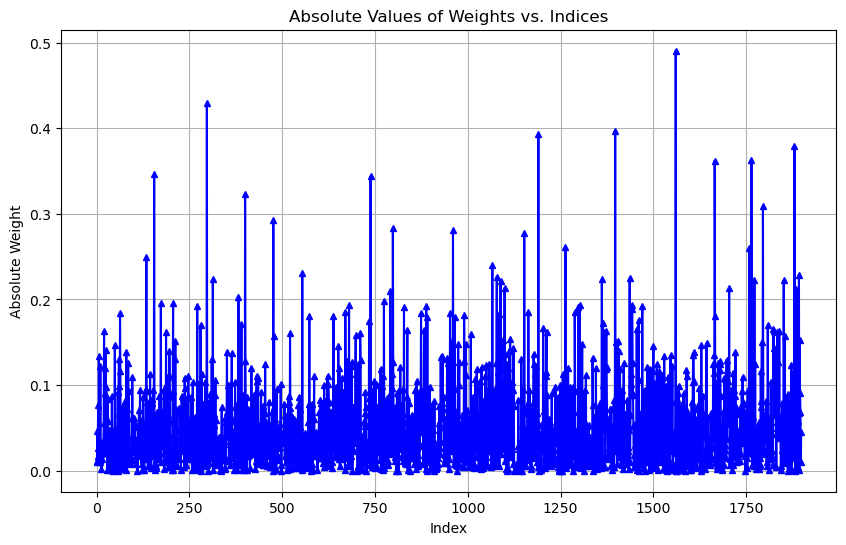

In [132]:
# Using the best model, I will retrain to ensure the weights are correct, 
spam_svc = LinearSVC(C = 0.05, random_state = 10, loss = 'hinge', dual = 'auto')
spam_svc.fit(X_train, y_train)
weights = spam_svc.coef_[0]

# Necessary Library, 
import matplotlib.pyplot as plt

print('\n === Absolute Value of Weights vs. Indices === \n')

plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(np.abs(weights), marker='^', linestyle='-', markersize=5, c  = 'b')
plt.title('Absolute Values of Weights vs. Indices')
plt.xlabel('Index')
plt.ylabel('Absolute Weight')
plt.show()

In [133]:
top_indices = np.argsort(np.abs(weights))[-15:]
top_indices = top_indices[::-1]
top_terms = vocab.iloc[top_indices]
top_terms
# Note below the weight vector is 0-indexed while our vocab df is 1-indexed and the difference is apparent below

,index,word
1560,1561,spamassassin
297,298,click
1397,1398,remov
1190,1191,our
1880,1881,wrote
1764,1765,url
1665,1666,the
155,156,basenumb
738,739,guarante
400,401,date


Text(0, 0.5, 'Absolute Weight')

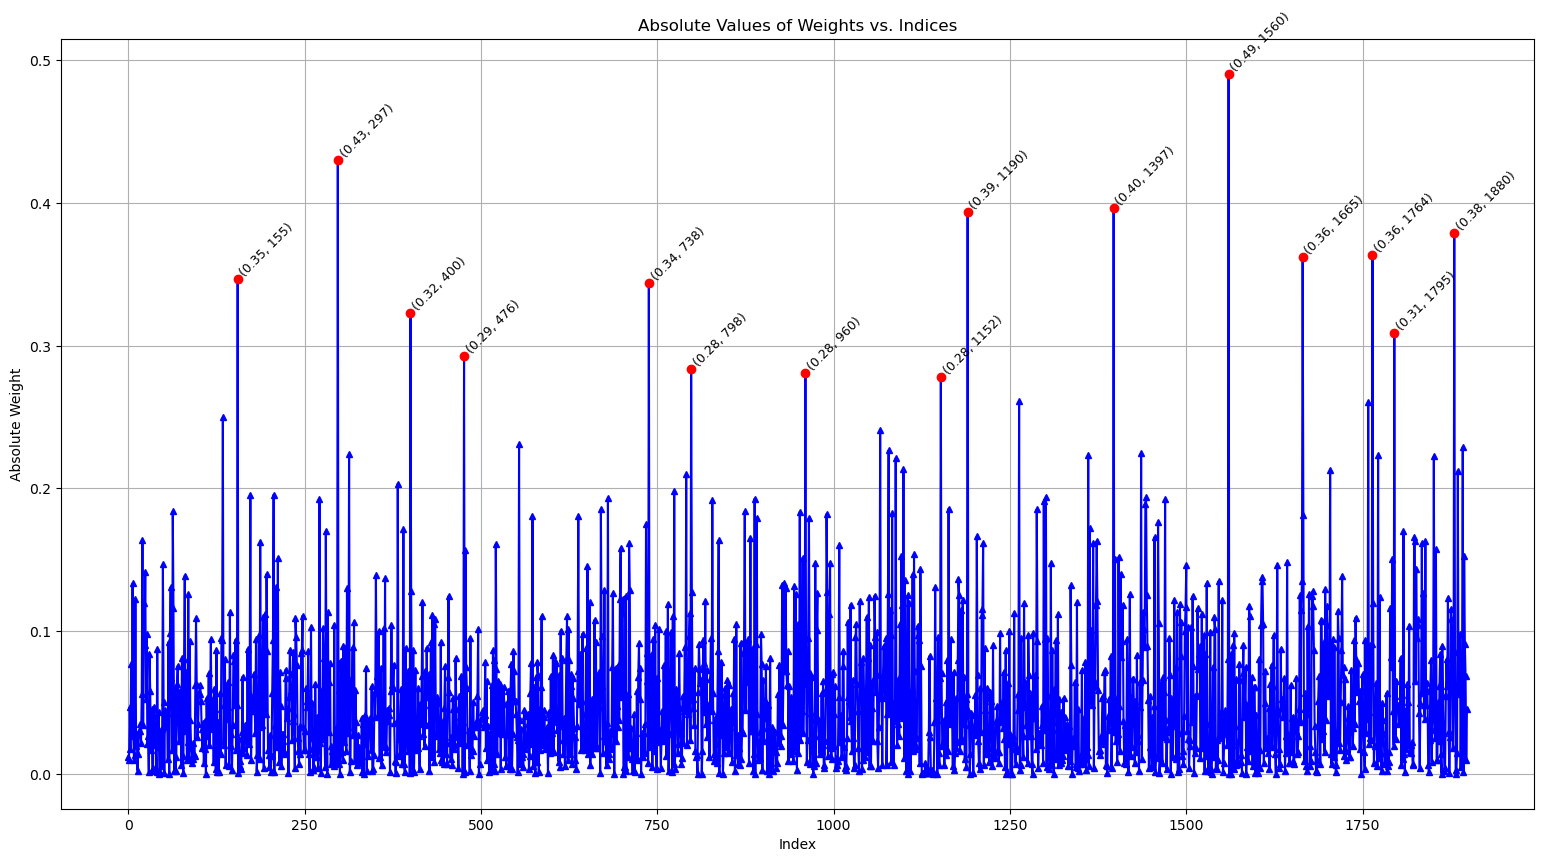

In [134]:
# Displaying our top weights with corresponding index (weight, index) for our top 15 
abs_weights = np.abs(weights)
plt.figure(figsize=(19, 10))
plt.grid(True)
plt.plot(abs_weights, marker='^', linestyle='-', markersize=5, c='b')
plt.scatter(top_indices, abs_weights[top_indices], color='red', zorder=5)
for index in top_indices:
    # Construct the label string
    label = f"({abs_weights[index]:.2f}, {index})"
    plt.text(index, abs_weights[index], label, fontsize=9, rotation=45, ha='left', va='bottom')
plt.title('Absolute Values of Weights vs. Indices')
plt.xlabel('Index')
plt.ylabel('Absolute Weight')